<a href="https://colab.research.google.com/github/alesepulveda1d/IB_AI_2017856/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 6 - FFNN**


*   Name: Alejandra Sepúlveda Rojas
*   ID: 2017856
*   Career: Biomedical Engineering
*   Group: 002
*   Class: Artificial Inteligence
*   Professor: Daniel Isaías López Páez
*   Hour: Thursday N4-N6


1. Load libraries

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2. Load data

In [19]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


3. Data Preprocessing

In [20]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


4. Model selection and training

In [21]:
#FNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
#Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6592 - loss: 1.0597
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8994 - loss: 0.3407
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9270 - loss: 0.2497
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9410 - loss: 0.2065
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9488 - loss: 0.1768
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9545 - loss: 0.1543
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9584 - loss: 0.1444
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9610 - loss: 0.1330
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9641 - loss: 0.1206
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9643 - loss: 0.1198


5. Model testing

In [24]:
test_results, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9716 - loss: 0.0966
Test accuracy: 0.9754999876022339


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: 7 Actual: 7


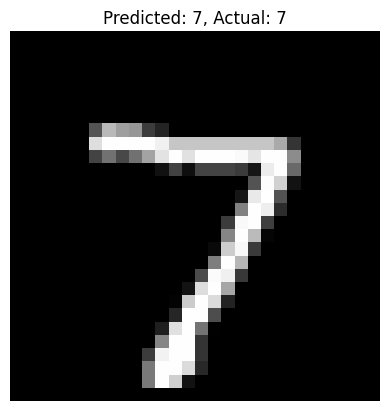

Prediction: 2 Actual: 2


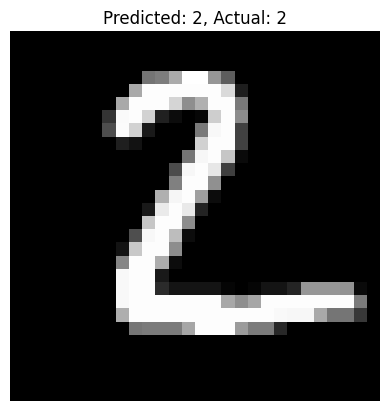

Prediction: 1 Actual: 1


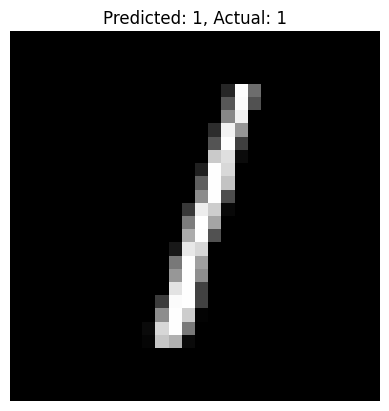

In [25]:
# Make predictions on the first 3 test images.
predictions = model.predict(test_images[:3])
for i in range(3):
    predicted_label = tf.argmax(predictions[i]).numpy()
    actual_label = tf.argmax(test_labels[i]).numpy()
    print("Prediction:", predicted_label, "Actual:", actual_label)

    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
    plt.show()
